<a href="https://colab.research.google.com/github/Chirox03/Handwritten-digits-recognition---MNIST/blob/main/Source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from sklearn.utils import shuffle

In [2]:
class NeuralNetwork:
  def __init__(self, layers, learning_rate=0.1):
    # initialize the list of weights matrices, then store the
    # network architecture and learning rate
    self.loss_history = []
    self.W = []
    self.layers = layers
    self.learning_rate = learning_rate
    for i in (np.arange(0, len(layers) - 2)):
      w = np.random.randn(layers[i]+1,layers[i+1]+1)
      self.W.append(w/np.sqrt(layers[i]))
      w = np.random.randn(layers[-2]+1,layers[-1])
      self.W.append(w/np.sqrt(layers[-2]))

  def __repr__(self):
    return "NeuralNetwork: {}, Learning rate = {}".format("-".join(str(l) for l in self.layers),self.learning_rate)

  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))

  def sigmoid_deriv(self,x):
    return x*(1-x)

  def calculate_loss_acc(self,X,target,addBias = True):
    target = np.atleast_2d(target)
    predictions = self.predict(X,addBias)
    loss = 0.5*np.sum((predictions-target)**2)/len(X)
    predictions = predictions.argmax(axis = 1)
    target = target.argmax(axis = 1)
    acc = np.sum(predictions == target)/len(target)*100 
    return loss,acc

  def feed_forward(self,x,y):
    A = [np.atleast_2d(x)]
    for layer in np.arange(0,len(self.W)):
      z = A[layer].dot(self.W[layer])
      a = self.sigmoid(z)
      A.append(a)
    return A

  def back_propagation(self,A,y):
    error = A[-1]-y # calculate the error between target and model's result
    D = [error*self.sigmoid_deriv(A[-1])] #the maxtrix of gradient
    #calculate the gradient backward
    for layer in np.arange(len(A)-2,0,-1):
      delta = D[-1].dot(self.W[layer].T)
      delta = delta*self.sigmoid_deriv(A[layer])
      D.append(delta)
    #reverse the D matrix 
    D = D[::-1]
    #update the W matrix
    for layer in np.arange(0,len(self.W)):
      self.W[layer] +=  - self.learning_rate*A[layer].T.dot(D[layer])

  def fit(self, X_train,y_train,epochs=1000):
    #add a 1s column into X in order to treat bias as a trainable param
    X_train = np.c_[X_train,np.ones((X_train.shape[0]))]
    #loop over epochs
    for epoch in np.arange(0,epochs):
      #shuffle training data
      X_train,y_train = shuffle(X_train,y_train)
      for(x,target) in tqdm(zip(X_train,y_train),total = len(X_train),desc = "Epoch {}".format(epoch+1)):
        A = self.feed_forward(x,target) #feed forward, save a history of activaton
        self.back_propagation(A,target) #back propagation
      loss,acc = self.calculate_loss_acc(X_train,y_train,addBias = False)
      self.loss_history.append(loss) #save loss history
      #print loss and accuracy through training time
      print("Loss: {0:15.9f}  Acc: {1:15.9f}%".format(loss,acc))

  def predict(self , X , addBias = True):
    p = np.atleast_2d(X)
    if addBias:
      p = np.c_[p,np.ones((p.shape[0]))]
    for layer in np.arange(0, len(self.W)):
      p = self.sigmoid(np.dot(p,self.W[layer]))
    return p
  def evaluate(self,X_test,y_test):
    print("Evaluating model.....")
    loss,acc = self.calculate_loss_acc(X_test,y_test,addBias=True)
    print("Accuracy: {0:7f}%\n".format(acc))
    print("Loss: {0:7f}".format(loss))


In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())
y_train= LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

X_train = np.reshape(X_train,(X_train.shape[0],28*28))
X_test = np.reshape(X_test,(X_test.shape[0],28*28))
X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


(10000, 784)

In [4]:
def plot_example(X, y):
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        tmp = y.argmax()
        plt.title(tmp)

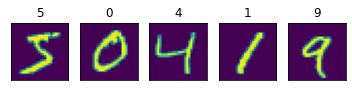

In [5]:
plot_example(X_train, y_train)

In [6]:
X_train.shape[0]

60000

In [7]:
model = NeuralNetwork([28*28,86,10],0.015)
print("Infor: {}".format(model))
print("Training network.....\n")
model.fit(X_train,y_train,epochs = 100)

Infor: NeuralNetwork: 784-86-10, Learning rate = 0.015
Training network.....



Epoch 1: 100%|██████████| 60000/60000 [00:44<00:00, 1334.73it/s]


Loss:     0.094629543  Acc:    89.980000000%


Epoch 2: 100%|██████████| 60000/60000 [00:28<00:00, 2079.92it/s]


Loss:     0.075726612  Acc:    91.555000000%


Epoch 3: 100%|██████████| 60000/60000 [00:28<00:00, 2092.73it/s]


Loss:     0.066132068  Acc:    92.585000000%


Epoch 4: 100%|██████████| 60000/60000 [00:28<00:00, 2079.71it/s]


Loss:     0.058761797  Acc:    93.338333333%


Epoch 5: 100%|██████████| 60000/60000 [00:28<00:00, 2088.01it/s]


Loss:     0.053706329  Acc:    93.988333333%


Epoch 6: 100%|██████████| 60000/60000 [00:28<00:00, 2092.45it/s]


Loss:     0.049981913  Acc:    94.423333333%


Epoch 7: 100%|██████████| 60000/60000 [00:29<00:00, 2048.28it/s]


Loss:     0.046697056  Acc:    94.748333333%


Epoch 8: 100%|██████████| 60000/60000 [00:28<00:00, 2096.09it/s]


Loss:     0.043587467  Acc:    95.135000000%


Epoch 9: 100%|██████████| 60000/60000 [00:28<00:00, 2091.98it/s]


Loss:     0.041377883  Acc:    95.280000000%


Epoch 10: 100%|██████████| 60000/60000 [00:28<00:00, 2085.09it/s]


Loss:     0.039175836  Acc:    95.660000000%


Epoch 11: 100%|██████████| 60000/60000 [00:29<00:00, 2043.41it/s]


Loss:     0.037454124  Acc:    95.850000000%


Epoch 12: 100%|██████████| 60000/60000 [00:28<00:00, 2077.06it/s]


Loss:     0.035922791  Acc:    96.018333333%


Epoch 13: 100%|██████████| 60000/60000 [00:28<00:00, 2102.61it/s]


Loss:     0.034000585  Acc:    96.265000000%


Epoch 14: 100%|██████████| 60000/60000 [00:28<00:00, 2087.63it/s]


Loss:     0.032857883  Acc:    96.390000000%


Epoch 15: 100%|██████████| 60000/60000 [00:28<00:00, 2097.84it/s]


Loss:     0.031560152  Acc:    96.536666667%


Epoch 16: 100%|██████████| 60000/60000 [00:28<00:00, 2115.61it/s]


Loss:     0.030547741  Acc:    96.695000000%


Epoch 17: 100%|██████████| 60000/60000 [00:28<00:00, 2105.68it/s]


Loss:     0.029025377  Acc:    96.840000000%


Epoch 18: 100%|██████████| 60000/60000 [00:28<00:00, 2108.77it/s]


Loss:     0.028231563  Acc:    96.973333333%


Epoch 19: 100%|██████████| 60000/60000 [00:28<00:00, 2101.57it/s]


Loss:     0.027229014  Acc:    97.080000000%


Epoch 20: 100%|██████████| 60000/60000 [00:28<00:00, 2110.10it/s]


Loss:     0.026658591  Acc:    97.226666667%


Epoch 21: 100%|██████████| 60000/60000 [00:28<00:00, 2107.97it/s]


Loss:     0.025843987  Acc:    97.303333333%


Epoch 22: 100%|██████████| 60000/60000 [00:28<00:00, 2093.23it/s]


Loss:     0.024833972  Acc:    97.410000000%


Epoch 23: 100%|██████████| 60000/60000 [00:28<00:00, 2105.64it/s]


Loss:     0.024080731  Acc:    97.503333333%


Epoch 24: 100%|██████████| 60000/60000 [00:28<00:00, 2115.57it/s]


Loss:     0.023597493  Acc:    97.546666667%


Epoch 25: 100%|██████████| 60000/60000 [00:28<00:00, 2115.08it/s]


Loss:     0.022815531  Acc:    97.686666667%


Epoch 26: 100%|██████████| 60000/60000 [00:28<00:00, 2103.20it/s]


Loss:     0.022200781  Acc:    97.768333333%


Epoch 27: 100%|██████████| 60000/60000 [00:28<00:00, 2111.50it/s]


Loss:     0.021781960  Acc:    97.796666667%


Epoch 28: 100%|██████████| 60000/60000 [00:28<00:00, 2105.54it/s]


Loss:     0.021076120  Acc:    97.860000000%


Epoch 29: 100%|██████████| 60000/60000 [00:28<00:00, 2120.41it/s]


Loss:     0.020671657  Acc:    97.913333333%


Epoch 30: 100%|██████████| 60000/60000 [00:25<00:00, 2362.80it/s]


Loss:     0.020150650  Acc:    97.996666667%


Epoch 31: 100%|██████████| 60000/60000 [00:27<00:00, 2148.63it/s]


Loss:     0.019537045  Acc:    98.041666667%


Epoch 32: 100%|██████████| 60000/60000 [00:25<00:00, 2341.88it/s]


Loss:     0.019086528  Acc:    98.101666667%


Epoch 33: 100%|██████████| 60000/60000 [00:27<00:00, 2155.45it/s]


Loss:     0.018679386  Acc:    98.190000000%


Epoch 34: 100%|██████████| 60000/60000 [00:25<00:00, 2381.79it/s]


Loss:     0.018290361  Acc:    98.223333333%


Epoch 35: 100%|██████████| 60000/60000 [00:27<00:00, 2172.37it/s]


Loss:     0.017919208  Acc:    98.298333333%


Epoch 36: 100%|██████████| 60000/60000 [00:25<00:00, 2359.79it/s]


Loss:     0.017394726  Acc:    98.318333333%


Epoch 37: 100%|██████████| 60000/60000 [00:27<00:00, 2147.38it/s]


Loss:     0.017229942  Acc:    98.346666667%


Epoch 38: 100%|██████████| 60000/60000 [00:25<00:00, 2348.60it/s]


Loss:     0.016947964  Acc:    98.373333333%


Epoch 39: 100%|██████████| 60000/60000 [00:28<00:00, 2125.03it/s]


Loss:     0.016408289  Acc:    98.431666667%


Epoch 40: 100%|██████████| 60000/60000 [00:25<00:00, 2355.34it/s]


Loss:     0.016018213  Acc:    98.480000000%


Epoch 41: 100%|██████████| 60000/60000 [00:27<00:00, 2151.42it/s]


Loss:     0.015678513  Acc:    98.511666667%


Epoch 42: 100%|██████████| 60000/60000 [00:25<00:00, 2380.76it/s]


Loss:     0.015653960  Acc:    98.538333333%


Epoch 43: 100%|██████████| 60000/60000 [00:27<00:00, 2152.84it/s]


Loss:     0.015166458  Acc:    98.546666667%


Epoch 44: 100%|██████████| 60000/60000 [00:25<00:00, 2347.71it/s]


Loss:     0.014965469  Acc:    98.628333333%


Epoch 45: 100%|██████████| 60000/60000 [00:27<00:00, 2156.04it/s]


Loss:     0.014653173  Acc:    98.630000000%


Epoch 46: 100%|██████████| 60000/60000 [00:25<00:00, 2353.06it/s]


Loss:     0.014398101  Acc:    98.666666667%


Epoch 47: 100%|██████████| 60000/60000 [00:27<00:00, 2153.85it/s]


Loss:     0.014181571  Acc:    98.683333333%


Epoch 48: 100%|██████████| 60000/60000 [00:29<00:00, 2064.90it/s]


Loss:     0.013921907  Acc:    98.720000000%


Epoch 49: 100%|██████████| 60000/60000 [00:27<00:00, 2168.98it/s]


Loss:     0.013717673  Acc:    98.738333333%


Epoch 50: 100%|██████████| 60000/60000 [00:28<00:00, 2076.38it/s]


Loss:     0.013558515  Acc:    98.753333333%


Epoch 51: 100%|██████████| 60000/60000 [00:27<00:00, 2148.51it/s]


Loss:     0.013231000  Acc:    98.783333333%


Epoch 52: 100%|██████████| 60000/60000 [00:29<00:00, 2061.61it/s]


Loss:     0.012925954  Acc:    98.820000000%


Epoch 53: 100%|██████████| 60000/60000 [00:27<00:00, 2153.65it/s]


Loss:     0.012839745  Acc:    98.828333333%


Epoch 54: 100%|██████████| 60000/60000 [00:29<00:00, 2042.90it/s]


Loss:     0.012506651  Acc:    98.865000000%


Epoch 55: 100%|██████████| 60000/60000 [00:27<00:00, 2146.75it/s]


Loss:     0.012773757  Acc:    98.856666667%


Epoch 56: 100%|██████████| 60000/60000 [00:29<00:00, 2057.90it/s]


Loss:     0.012251762  Acc:    98.886666667%


Epoch 57: 100%|██████████| 60000/60000 [00:27<00:00, 2147.89it/s]


Loss:     0.012010537  Acc:    98.920000000%


Epoch 58: 100%|██████████| 60000/60000 [00:29<00:00, 2062.41it/s]


Loss:     0.011829066  Acc:    98.920000000%


Epoch 59: 100%|██████████| 60000/60000 [00:27<00:00, 2154.22it/s]


Loss:     0.011959844  Acc:    98.928333333%


Epoch 60: 100%|██████████| 60000/60000 [00:29<00:00, 2067.52it/s]


Loss:     0.011525037  Acc:    98.955000000%


Epoch 61: 100%|██████████| 60000/60000 [00:28<00:00, 2130.25it/s]


Loss:     0.011371355  Acc:    98.965000000%


Epoch 62: 100%|██████████| 60000/60000 [00:29<00:00, 2062.63it/s]


Loss:     0.011148283  Acc:    98.975000000%


Epoch 63: 100%|██████████| 60000/60000 [00:27<00:00, 2144.46it/s]


Loss:     0.011059324  Acc:    98.990000000%


Epoch 64: 100%|██████████| 60000/60000 [00:29<00:00, 2018.71it/s]


Loss:     0.010991838  Acc:    98.980000000%


Epoch 65: 100%|██████████| 60000/60000 [00:27<00:00, 2147.65it/s]


Loss:     0.010690993  Acc:    99.025000000%


Epoch 66: 100%|██████████| 60000/60000 [00:29<00:00, 2063.97it/s]


Loss:     0.010566452  Acc:    99.041666667%


Epoch 67: 100%|██████████| 60000/60000 [00:28<00:00, 2121.03it/s]


Loss:     0.010400722  Acc:    99.065000000%


Epoch 68: 100%|██████████| 60000/60000 [00:29<00:00, 2059.37it/s]


Loss:     0.010277066  Acc:    99.053333333%


Epoch 69: 100%|██████████| 60000/60000 [00:28<00:00, 2122.12it/s]


Loss:     0.010119534  Acc:    99.058333333%


Epoch 70: 100%|██████████| 60000/60000 [00:29<00:00, 2041.18it/s]


Loss:     0.010008750  Acc:    99.086666667%


Epoch 71: 100%|██████████| 60000/60000 [00:27<00:00, 2146.16it/s]


Loss:     0.009863405  Acc:    99.095000000%


Epoch 72: 100%|██████████| 60000/60000 [00:29<00:00, 2059.27it/s]


Loss:     0.009729575  Acc:    99.101666667%


Epoch 73: 100%|██████████| 60000/60000 [00:27<00:00, 2151.45it/s]


Loss:     0.009579198  Acc:    99.118333333%


Epoch 74: 100%|██████████| 60000/60000 [00:29<00:00, 2039.45it/s]


Loss:     0.009505439  Acc:    99.128333333%


Epoch 75: 100%|██████████| 60000/60000 [00:27<00:00, 2154.14it/s]


Loss:     0.009337346  Acc:    99.135000000%


Epoch 76: 100%|██████████| 60000/60000 [00:29<00:00, 2043.92it/s]


Loss:     0.009257012  Acc:    99.143333333%


Epoch 77: 100%|██████████| 60000/60000 [00:27<00:00, 2147.57it/s]


Loss:     0.009096550  Acc:    99.155000000%


Epoch 78: 100%|██████████| 60000/60000 [00:29<00:00, 2029.75it/s]


Loss:     0.009144316  Acc:    99.160000000%


Epoch 79: 100%|██████████| 60000/60000 [00:28<00:00, 2134.66it/s]


Loss:     0.008938571  Acc:    99.158333333%


Epoch 80: 100%|██████████| 60000/60000 [00:29<00:00, 2024.45it/s]


Loss:     0.008874136  Acc:    99.185000000%


Epoch 81: 100%|██████████| 60000/60000 [00:27<00:00, 2142.86it/s]


Loss:     0.008729455  Acc:    99.185000000%


Epoch 82: 100%|██████████| 60000/60000 [00:29<00:00, 2040.77it/s]


Loss:     0.008607365  Acc:    99.203333333%


Epoch 83: 100%|██████████| 60000/60000 [00:27<00:00, 2158.51it/s]


Loss:     0.008534267  Acc:    99.206666667%


Epoch 84: 100%|██████████| 60000/60000 [00:29<00:00, 2039.53it/s]


Loss:     0.008366472  Acc:    99.216666667%


Epoch 85: 100%|██████████| 60000/60000 [00:28<00:00, 2127.55it/s]


Loss:     0.008312767  Acc:    99.221666667%


Epoch 86: 100%|██████████| 60000/60000 [00:29<00:00, 2055.32it/s]


Loss:     0.008385308  Acc:    99.241666667%


Epoch 87: 100%|██████████| 60000/60000 [00:27<00:00, 2159.04it/s]


Loss:     0.008188017  Acc:    99.230000000%


Epoch 88: 100%|██████████| 60000/60000 [00:29<00:00, 2060.17it/s]


Loss:     0.008040503  Acc:    99.248333333%


Epoch 89: 100%|██████████| 60000/60000 [00:28<00:00, 2133.66it/s]


Loss:     0.007997608  Acc:    99.250000000%


Epoch 90: 100%|██████████| 60000/60000 [00:29<00:00, 2031.08it/s]


Loss:     0.007871542  Acc:    99.251666667%


Epoch 91: 100%|██████████| 60000/60000 [00:27<00:00, 2149.98it/s]


Loss:     0.007809949  Acc:    99.255000000%


Epoch 92: 100%|██████████| 60000/60000 [00:29<00:00, 2043.68it/s]


Loss:     0.007765688  Acc:    99.268333333%


Epoch 93: 100%|██████████| 60000/60000 [00:28<00:00, 2122.48it/s]


Loss:     0.007791770  Acc:    99.273333333%


Epoch 94: 100%|██████████| 60000/60000 [00:29<00:00, 2056.29it/s]


Loss:     0.007545947  Acc:    99.280000000%


Epoch 95: 100%|██████████| 60000/60000 [00:28<00:00, 2130.34it/s]


Loss:     0.007429412  Acc:    99.293333333%


Epoch 96: 100%|██████████| 60000/60000 [00:29<00:00, 2051.14it/s]


Loss:     0.007457375  Acc:    99.293333333%


Epoch 97: 100%|██████████| 60000/60000 [00:27<00:00, 2155.31it/s]


Loss:     0.007317916  Acc:    99.308333333%


Epoch 98: 100%|██████████| 60000/60000 [00:29<00:00, 2046.26it/s]


Loss:     0.007266177  Acc:    99.305000000%


Epoch 99: 100%|██████████| 60000/60000 [00:28<00:00, 2139.87it/s]


Loss:     0.007181817  Acc:    99.306666667%


Epoch 100: 100%|██████████| 60000/60000 [00:29<00:00, 2038.54it/s]


Loss:     0.007109198  Acc:    99.306666667%


Text(0, 0.5, 'Loss')

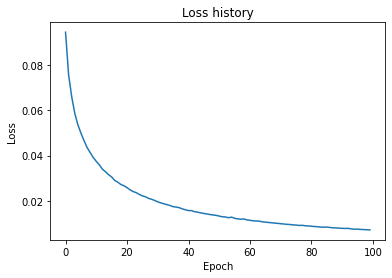

In [8]:
plt.plot(model.loss_history)
plt.title("Loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [9]:
model.evaluate(X_test,y_test)

Evaluating model.....
Accuracy: 97.650000%

Loss: 0.021238


In [10]:
predictions = model.predict(X_test)
predictions = predictions.argmax(axis = 1)
print(predictions[:5])

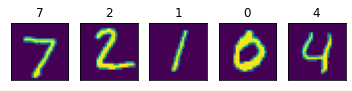

In [13]:
plot_example(X_test,y_test)